In [32]:
import tensorflow.compat.v1 as tf
import tensorflow
import numpy as np
import h5py
import matplotlib.pyplot as plt
from tensorflow.python.framework import ops
import tf_utils
import time

## TensorFlow代码实现结构如下：
### 1、创建TensorFlow变量
### 2、实现TensorFlow变量之间的操作定义
### 3、初始化TensorFlow变量
### 4、创建Session
### 5、运行Session，之前编写的操作都会在这一步运行

In [14]:
np.random.seed(1)

tf.disable_eager_execution() 

y_hat = tf.constant(36,name="y_hat") #定义y_hat常量为36
y = tf.constant(39,name="y") # 定义y常量为39

loss = tf.Variable((y-y_hat)**2,name="loss") # 定义损失函数为一个变量
init = tf.global_variables_initializer() # 初始化变量，损失函数将被初始化并准备计算

with tf.Session() as session: # 创建一个session
    session.run(init) # 运行初始化变量
    print(session.run(loss))


9


## 占位符（placeholders）
### 占位符是一个对象，它的值只能在稍后指定，要指定占位符的值，可以使用一个feed字典（feed_dict变量）来传入

In [18]:
x = tf.placeholder(tf.int64,name="x")
print(sess.run(2 * x, feed_dict={x:3}))
sess.close()

6


### 1.1 线性函数

In [19]:
def linear_function():
    """线性函数Y=WX+b"""
    np.random.seed(1)
    
    X = np.random.randn(3,1)
    W = np.random.randn(4,3)
    b = np.random.randn(4,1)
    
    Y = tf.add(tf.matmul(W,X),b) #matmul矩阵乘法
    
    # 创建session并运行
    sess = tf.Session()
    result = sess.run(Y)
    
    # session使用完毕，关闭
    sess.close()
    
    return result
    

In [20]:
# 测试线性函数
print(linear_function())

[[-2.15657382]
 [ 2.95891446]
 [-1.08926781]
 [-0.84538042]]


### 1.2 sigmoid函数

In [21]:
def sigmoid(z):
    x = tf.placeholder(tf.float32,name="x")
    
    sigmoid = tf.sigmoid(x)
    
    with tf.Session() as sess:
        result = sess.run(sigmoid,feed_dict={x:z})
        
    return result

In [22]:
# 测试sigmoid
print(sigmoid(0))
print(sigmoid(12))

0.5
0.9999939


### 1.3 成本函数
实现成本函数，需要用到的是：
tf.nn.sigmoid_cross_entropy_with_logitsv2(logits = ..., labels = ...)
  你的代码应该输入z，计算sigmoid（得到a），然后计算交叉熵成本J，所有的步骤都可以通过一次调用tf.nn.sigmoid_cross_entropy_with_logitsv2来完成。

### 1.4 使用独热编码

In [23]:
def one_hot_matrix(labels,C):
    """对样本进行独热编码"""
    
    # 创建常量C
    C = tf.constant(C,name="C")
    
    # 使用tf.one.hot进行独热编码
    one_hot_matrix = tf.one_hot(indices=labels,depth=C,axis=0)
    
    # 创建session并运行
    sess = tf.Session()
    one_hot = sess.run(one_hot_matrix)
    
    # 关闭session
    sess.close()
    
    return one_hot

In [24]:
# 测试独热编码
labels = np.array([1,2,3,0,2,1])
one_hot = one_hot_matrix(labels,C=4)
print(one_hot)

[[0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0.]]


### 初始化0和1向量

In [25]:
def ones(shape):
    """创建全1向量"""
    ones = tf.ones(shape)
    
    sess = tf.Session()
    ones = sess.run(ones)
    
    sess.close()
    
    return ones

In [26]:
# 测试初始化1向量
ones([3])

array([1., 1., 1.], dtype=float32)

## 2-使用TensorFlow构建神经网络
### 建立一个算法，使有语音障碍的人与不懂手语的人交流。

### 训练集：有从0到5的数字的1080张图片(64x64像素)，每个数字拥有180张图片。
### 测试集：有从0到5的数字的120张图片(64x64像素)，每个数字拥有5张图片

[1]


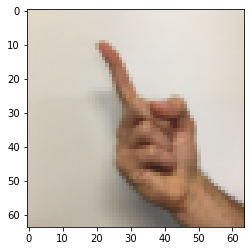

In [28]:
# 加载训练集
X_train_orig,Y_train_orig,X_test_orig,Y_test_orig,classes = tf_utils.load_dataset()

index = 11
plt.imshow(X_train_orig[index])
print(Y_train_org[:,index])

In [29]:
# 数据处理和归一化
X_train_flatten = X_train_orig.reshape(X_train_orig.shape[0],-1).T
X_test_flatten = X_test_orig.reshape(X_test_orig.shape[0],-1).T

X_train = X_train_flatten / 255
X_test = X_test_flatten / 255

# Y转换为独热矩阵
Y_train = tf_utils.convert_to_one_hot(Y_train_orig,6)
Y_test = tf_utils.convert_to_one_hot(Y_test_orig,6)

X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((12288, 1080), (12288, 120), (6, 1080), (6, 120))

### 2.1 创建placeholders

In [120]:
def create_placeholders(n_x,n_y):
    """创建占位符"""
    X = tf.placeholder(tf.float32,[n_x,None],name="X") # 使用None灵活处理占位符提供的样本数量
    Y = tf.placeholder(tf.float32,[n_y,None],name="Y")

    return X,Y

In [81]:
# 测试创建placeholders
X,Y = create_placeholders(12288,6)
X,Y

(<tf.Tensor 'X_1:0' shape=(12288, None) dtype=float32>,
 <tf.Tensor 'Y_1:0' shape=(6, None) dtype=float32>)

### 2.2 初始化参数
tf.Variable() 每次都在创建新对象，对于get_variable()来说，对于已经创建的变量对象，就把那个对象返回，如果没有创建变量对象的话，就创建一个新的

In [82]:
def init_params():
    """初始化神经网络参数W和b"""
    tf.set_random_seed(1)
    
    W1 = tf.get_variable("W1",[25,12288],initializer=tf.glorot_uniform_initializer(seed=1)) # glorot_uniform_initializer初始化权值
    b1 = tf.get_variable("b1",[25,1],initializer=tf.zeros_initializer()) # zeros_initializer初始化全零
    W2 = tf.get_variable("W2",[12,25],initializer=tf.glorot_uniform_initializer(seed=1)) 
    b2 = tf.get_variable("b2",[12,1],initializer=tf.zeros_initializer()) 
    W3 = tf.get_variable("W3",[6,12],initializer=tf.glorot_uniform_initializer(seed=1)) 
    b3 = tf.get_variable("b3",[6,1],initializer=tf.zeros_initializer()) 
    
    params = {
        "W1":W1,"b1":b1,"W2":W2,"b2":b2,"W3":W3,"b3":b3
    }
    
    return params

In [83]:
# 测试初始化参数
tf.reset_default_graph() # 清除默认图形堆栈并重置全局默认图形

with tf.Session() as sess:
    params = init_params()
    print(params["W1"])
    print(params["W2"])
    print(params["b1"])
    print(params["b2"])
    print(params["W3"])
    print(params["b3"])

<tf.Variable 'W1:0' shape=(25, 12288) dtype=float32>
<tf.Variable 'W2:0' shape=(12, 25) dtype=float32>
<tf.Variable 'b1:0' shape=(25, 1) dtype=float32>
<tf.Variable 'b2:0' shape=(12, 1) dtype=float32>
<tf.Variable 'W3:0' shape=(6, 12) dtype=float32>
<tf.Variable 'b3:0' shape=(6, 1) dtype=float32>


### 2.3 前向传播

In [116]:
def forward_prop(X,params):
    """前向传播ReLU+softmax"""
    
    W1 = params["W1"]
    b1 = params["b1"]
    W2 = params["W2"]
    b2 = params["b2"]
    W3 = params["W3"]
    b3 = params["b3"]
    
    Z1 = tf.matmul(W1,X) + b1
    A1 = tf.nn.relu(Z1)
    Z2 = tf.matmul(W2,A1) + b2
    A2 = tf.nn.relu(Z2)
    Z3 = tf.matmul(W3,A2) + b3
    
    return Z3 # tensorflow中最后线性输出层的输出作为计算损失函数的输入，不需要A3

In [117]:
# 测试前向传播
tf.reset_default_graph()

with tf.Session() as sess:
    X,Y = create_placeholders(12288,6)
    params = init_params()
    Z3 = forward_prop(X,params)
    print(Z3)

(12288, None)
(6, None)
Tensor("add_2:0", shape=(6, None), dtype=float32)


### 2.4 计算成本函数

In [144]:
def compute_cost(Z3,Y):
    """计算成本函数"""
    
    logits = tf.transpose(Z3) # transpose转置
    labels = tf.transpose(Y)
    
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=labels,logits=logits))
    
    return cost

In [145]:
# 测试成本函数
tf.reset_default_graph()

with tf.Session() as sess:
    X,Y = create_placeholders(12288,6)
    params = init_params()
    Z3 = forward_prop(X,params)
    cost = compute_cost(Z3,Y)
    print(cost)

Tensor("Mean:0", shape=(), dtype=float32)


### 2.5 反向传播和更新参数
得益于编程框架，所有反向传播和参数更新都在1行代码中处理。计算成本函数后，将创建一个“optimizer”对象。 运行tf.session时，必须将此对象与成本函数一起调用，当被调用时，它将使用所选择的方法和学习速率对给定成本进行优化。

### 2.6 构建模型

In [159]:
def model(X_train,Y_train,X_test,Y_test,a=0.0001,epochs=1500,minibatch_size=64,isPrint=True,isPlot=True):
    """三层TensorFlow神经网络模型"""
    ops.reset_default_graph() # 重新运行模型时不覆盖tf变量
    tf.set_random_seed(1)
    seed = 3
    (n_x,m) = X_train.shape
    n_y = Y_train.shape[0]
    costs = []
    
    # 给X和Y创建占位符
    X,Y = create_placeholders(n_x,n_y)

    # 初始化参数
    params = init_params()
    
    # 前向传播
    Z3 = forward_prop(X,params)
    
    # 计算成本
    cost = compute_cost(Z3,Y)
    
    # 反向传播
    optimizer = tf.train.AdamOptimizer(learning_rate=a).minimize(cost) # 用Adam算法优化
    
    # 初始化所有变量
    init = tf.global_variables_initializer()
    
    # 开始会话并计算
    with tf.Session() as sess:
        # 初始化
        sess.run(init)
        
        # 训练循环
        for epoch in range(epochs):
            epoch_cost = 0 # 每代的成本
            num_minibatches = int(m / minibatch_size) # mini-batch数量
            seed = seed + 1
            minibatches = tf_utils.random_mini_batches(X_train,Y_train,minibatch_size,seed)
            
            for minibatch in minibatches:
                (batch_X,batch_Y) = minibatch
                
                # 运行session计算optimizer和cost
                _ ,minibatch_cost = sess.run([optimizer,cost],feed_dict={X:batch_X,Y:batch_Y})
                
                # 计算该mini-batch在该epoch中的误差
                epoch_cost = epoch_cost + minibatch_cost / num_minibatches
                
            if epoch % 5 == 0:
                costs.append(epoch_cost)
                if isPrint and epoch % 100 == 0:
                    print("第%d代误差为%f" % (epoch,epoch_cost))
                    
        if isPlot:
            plt.plot(np.squeeze(costs))
            plt.xlabel('epochs per tens')
            plt.ylabel('cost')
            plt.title("Learning rate = %f" % a)
            plt.show()
                
        # 保存学习后的参数
        params = sess.run(params)
        print("参数以保存到session")
            
        # 预测并计算准确率
        pre = tf.equal(tf.argmax(Z3),tf.argmax(Y))
        acc = tf.reduce_mean(tf.cast(pre,"float"))
        
        print("训练集准确率：",acc.eval({X:X_train,Y:Y_train}))
        print("测试集准确率：",acc.eval({X:X_test,Y:Y_test}))
        
        return params

第0代误差为1.899366
第100代误差为1.178147
第200代误差为0.742681
第300代误差为0.488005
第400代误差为0.333458
第500代误差为0.231950
第600代误差为0.150170
第700代误差为0.101681
第800代误差为0.067098
第900代误差为0.044746
第1000代误差为0.029050
第1100代误差为0.018227
第1200代误差为0.011528
第1300代误差为0.007265
第1400代误差为0.003867


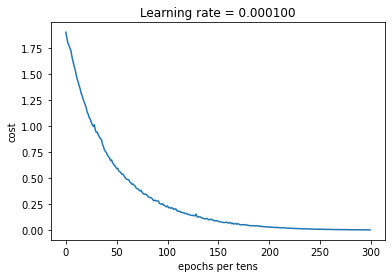

参数以保存到session
训练集准确率： 1.0
测试集准确率： 0.8833333


TypeError: must be real number, not builtin_function_or_method

In [160]:
# 开始训练
params = model(X_train,Y_train,X_test,Y_test)
time.process_time()
# 计算时差
print("运行时间：%f" % time.process_time)